In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers


In [3]:
tf.random.set_seed(42)
model = Sequential(
Dense(1)
)

In [4]:
model

In [5]:
# Data
X = (np.arange(-200,200,4))
y = X + 10

In [6]:
X,y

(array([-200, -196, -192, -188, -184, -180, -176, -172, -168, -164, -160,
        -156, -152, -148, -144, -140, -136, -132, -128, -124, -120, -116,
        -112, -108, -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,
         -68,  -64,  -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,
         -24,  -20,  -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,
          20,   24,   28,   32,   36,   40,   44,   48,   52,   56,   60,
          64,   68,   72,   76,   80,   84,   88,   92,   96,  100,  104,
         108,  112,  116,  120,  124,  128,  132,  136,  140,  144,  148,
         152,  156,  160,  164,  168,  172,  176,  180,  184,  188,  192,
         196]),
 array([-190, -186, -182, -178, -174, -170, -166, -162, -158, -154, -150,
        -146, -142, -138, -134, -130, -126, -122, -118, -114, -110, -106,
        -102,  -98,  -94,  -90,  -86,  -82,  -78,  -74,  -70,  -66,  -62,
         -58,  -54,  -50,  -46,  -42,  -38,  -34,  -30,  -26,  -22,  -18,
         -14,  -10,   

In [7]:
# Splitting of Data
# 80 % training data & 20 % Test data
train_X = X[:int((0.8) * 100)]
train_y = y[:int((0.8) * 100)]


## Test Data

test_X = X[int((0.8) * 100):]
test_y = y[int((0.8) * 100): ]

In [8]:
assert (len(train_X) + len(test_X)) == len(X)
len(X)

100

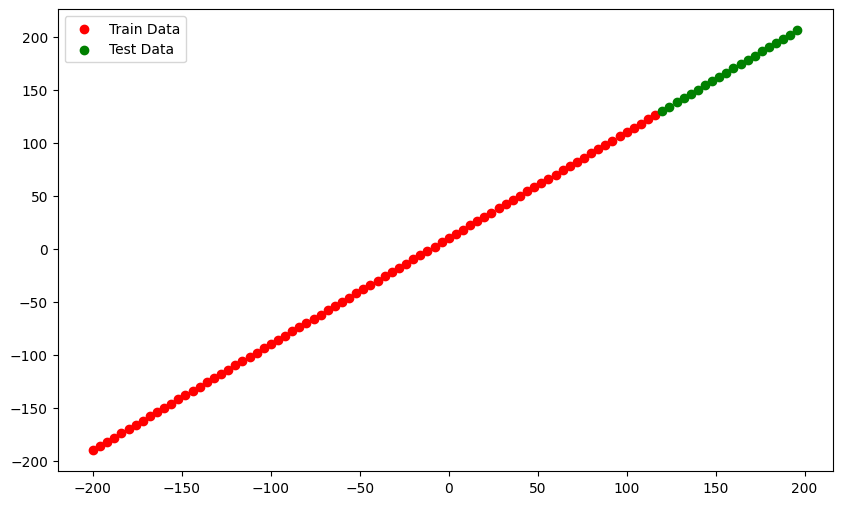

In [9]:
# Visualization

plt.figure(figsize=(10,6))

plt.scatter(train_X, train_y, c='r',label="Train Data")
plt.scatter(test_X, test_y, c='g', label= "Test Data")
plt.legend()

In [10]:
tf.random.set_seed(42)
model = Sequential([
Dense(1, input_shape=[1])
]
)

# Model Compilation

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])
                       

# model.compile(loss=tf.keras.losses.mae,
#              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#              metrics=["mae"])
# model.summary()

In [11]:
model.fit(train_X, train_y, epochs=1000, verbose=0)

In [12]:
model.predict([200])

1/1 [==============================] - 0s 263ms/step


array([[260.13922]], dtype=float32)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
y_predicts = model.predict(test_X)

1/1 [==============================] - 0s 62ms/step


In [16]:
test_y,y_predicts

(array([130, 134, 138, 142, 146, 150, 154, 158, 162, 166, 170, 174, 178,
        182, 186, 190, 194, 198, 202, 206]),
 array([[157.9398 ],
        [163.04977],
        [168.15974],
        [173.26971],
        [178.37968],
        [183.48965],
        [188.59962],
        [193.70961],
        [198.81958],
        [203.92955],
        [209.03952],
        [214.14949],
        [219.25946],
        [224.36943],
        [229.47942],
        [234.58939],
        [239.69936],
        [244.80933],
        [249.9193 ],
        [255.02927]], dtype=float32))

In [17]:
class PredictPlot:
    def __init__(self,train_X, train_y,test_X,test_y, predict_val)-> None:
        self.train_X = np.array(train_X)
        self.train_y = np.array(train_y)
        self.test_X = np.array(test_X)
        self.test_y = np.array(test_y)
        self.predict = np.array(predict_val)
        self.plotThePrediction()
        
    def plotThePrediction(self):
        plt.figure(figsize=(10,7))
        plt.scatter(self.test_X, self.test_y, c='r', label="Testing Data")
        plt.scatter(self.train_X, self.train_y, c='g', label="Training Data")
        plt.scatter(self.test_X, self.predict, c='b', label="Prediction")
        plt.legend();


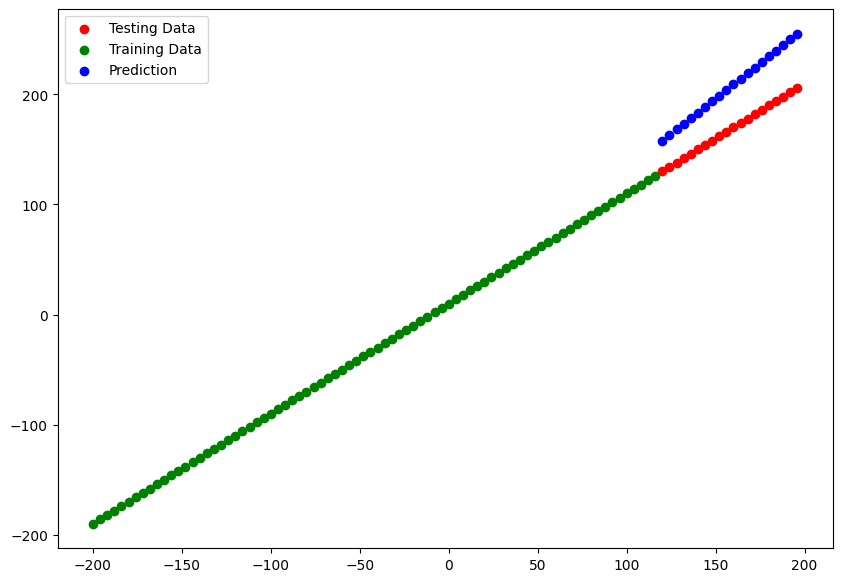

In [18]:
PredictPlot(train_X, train_y,test_X, test_y, y_predicts)

## Evaluating Predictions

In [19]:
model.evaluate(test_X, test_y)

1/1 [==============================] - 0s 352ms/step - loss: 38.4845 - mae: 38.4845


[38.484535217285156, 38.484535217285156]

In [20]:
# Mean Absolute Error

mae = tf.metrics.mean_absolute_error(y_true=test_X, y_pred=y_predicts)

In [21]:
test_y.shape, y_predicts.shape

((20,), (20, 1))

In [22]:
mae

# but in our case, the y val should be near around 10

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([20.      , 20.304977, 21.247923, 22.907887, 25.189842, 28.093792,
       31.679699, 35.93865 , 40.81958 , 45.929554, 51.03952 , 56.149487,
       61.25946 , 66.36943 , 71.479416, 76.589386, 81.699356, 86.809326,
       91.9193  , 97.029274], dtype=float32)>

### Fix the dimensionality 

In [23]:
test_y, y_predicts.squeeze()

(array([130, 134, 138, 142, 146, 150, 154, 158, 162, 166, 170, 174, 178,
        182, 186, 190, 194, 198, 202, 206]),
 array([157.9398 , 163.04977, 168.15974, 173.26971, 178.37968, 183.48965,
        188.59962, 193.70961, 198.81958, 203.92955, 209.03952, 214.14949,
        219.25946, 224.36943, 229.47942, 234.58939, 239.69936, 244.80933,
        249.9193 , 255.02927], dtype=float32))

In [24]:
# Mean Absolute Error

mae = tf.metrics.mean_absolute_error(y_true=test_X, y_pred=y_predicts.squeeze())

In [25]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=48.484535>

In [26]:
# Sqeeuzing to match the dimensionality

def calculate_mae(train_data, predict_data):
    return tf.metrics.mean_absolute_error(y_true=train_data, y_pred=predict_data.squeeze())

def calculate_mse(train_data, predict_data):
    return tf.metrics.mean_squared_error(y_true=train_data, y_pred=predict_data.squeeze())

In [27]:
mae = calculate_mae(test_X, y_predicts)
mse = calculate_mse(test_X, y_predicts)
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=48.484535>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2391.7153>)

***Let's Create 3 Different Models***

- **Model_1 = 1 Hidden Layer, epochs =100 | 200 | 300 | 400 | 500 | 600**

- **Model_2 = 3 Hidden Layers, epochs = 100**

- **Model_3 = 2 Hidden Layers, epochs = 200**


## Model 1

1/1 [==============================] - 0s 121ms/step
tf.Tensor(61.973534, shape=(), dtype=float32) tf.Tensor(3922.711, shape=(), dtype=float32)


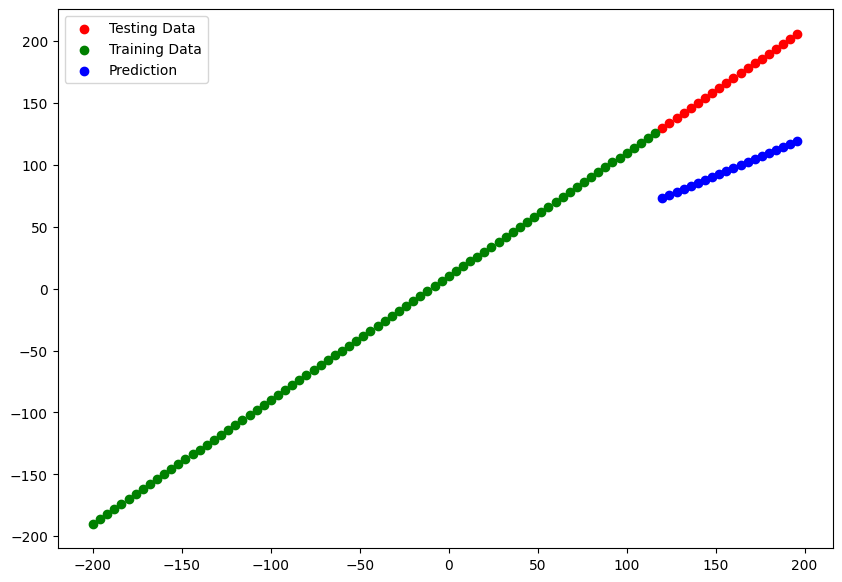

In [28]:
tf.random.set_seed(42)

# 1. Create a Model

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model

model1.fit(train_X, train_y, epochs=10, verbose=0)

# 4. Predict the values

y_predicts1 = (model1.predict(test_X))

# 5. Visualize the real & predicted values

PredictPlot(train_X, train_y, test_X , test_y , y_predicts1)

# 6. Calculate the mae & mse 
mae1 = calculate_mae(test_X, y_predicts1)
mse1 = calculate_mse(test_X, y_predicts1)
print(mae1, mse1)


### Model 2

1/1 [==============================] - 0s 146ms/step
tf.Tensor(158.57541, shape=(), dtype=float32) tf.Tensor(25678.12, shape=(), dtype=float32)


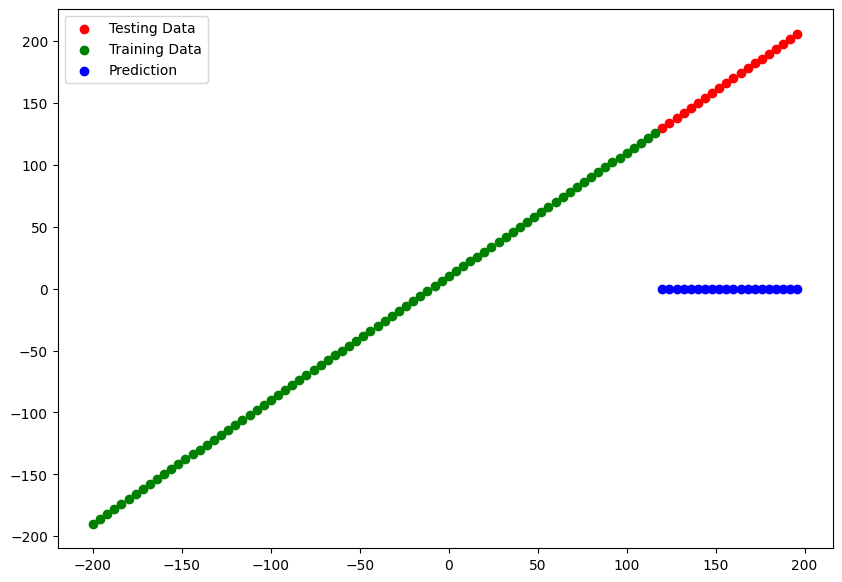

In [46]:
tf.random.set_seed(42)

# 1. Create a Model

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model

model2.fit(tf.expand_dims(train_X, axis=-1), train_y, epochs=100, verbose=0)

# 4. Predict the values

y_predicts2 = model2.predict(test_X)

# test_X.shape, test_y.shape , train_X.shape , train_y.shape , y_predicts2.shape

# 5. Visualize the real & predicted values

PredictPlot(train_X, train_y, test_X , test_y , y_predicts2)

# 6. Calculate the mae & mse 
mae2 = calculate_mae(test_X, y_predicts2)
mse2 = calculate_mse(test_X, y_predicts2)
print(mae2, mse2)


### Model 3

1/1 [==============================] - 0s 127ms/step
tf.Tensor(149.9919, shape=(), dtype=float32) tf.Tensor(22977.348, shape=(), dtype=float32)


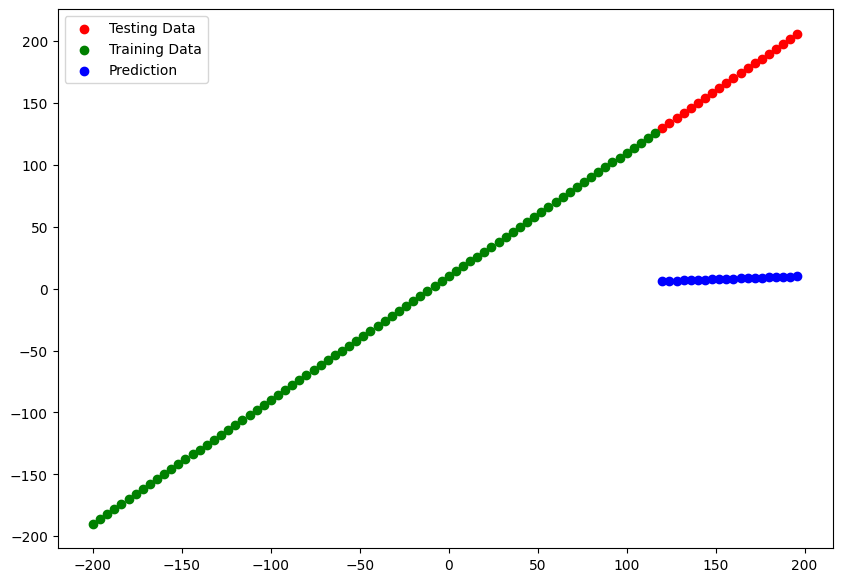

In [49]:
# 1. Create a Model

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1, input_shape=[1])
])
 
# 2. Model Compilation

model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Model Fitting 

model3.fit(tf.expand_dims(train_X, axis=-1), train_y, epochs=300, verbose=0)

# 4. Prediction

y_predicts3 = model3.predict(test_X)

# 5. Visualization

PredictPlot(train_X, train_y, test_X, test_y, y_predicts3)

# 6. Calculate the errors

mae3 = calculate_mae(test_X, y_predicts3)
mse3 = calculate_mse(test_X, y_predicts3)
print(mae3, mse3)

## Framing the Prediction

In [50]:
import pandas as pd

In [74]:
df = pd.DataFrame({
    "Model" : ["Model1", "Model2" , "Model3"],
    "Mean_Absolute_Error" : [np.array(mae1), np.array(mae2) ,np.array(mae3)],
    "Mean_Square_Error"   : [np.array(mse1), np.array(mse2) ,np.array(mse3)]
})

In [76]:
df

,Model,Mean_Absolute_Error,Mean_Square_Error
0,Model1,61.973534,3922.711
1,Model2,158.57541,25678.12
2,Model3,149.9919,22977.348
